Diabetes is one of the most dangerous metabolic diseases in today’s world. Diabetes is a chronic health issue. There are two types of diabetes. Diabetes mellitus and diabetes. A huge number of people are becoming its victims day by day, and many are unaware if they have it or not. Machine learning will play a major role in the research related work to detect and timely cure it for the people. Nowadays so much research is going on this topic. They are trying to predict diabetes in the early stage. Early detection of diabetes can reduce a patient's health risk. This analysis is based on the dataset to clarify which algorithm gives us the best result and intuitively provides the main factors of having diabetes. Thus we can take precautions and proper remedies to prevent diabetes.

In this notebook, we try to analyze the diffrent factors that influence a patient to be diabetic or non-diabetic.  
We'll also try to do some analysis on features (feature importance).

# Outline 
[1. Import libraries](#1)  
[2. Dataset Analysis](#2)
  - [Data Distribution](#2.1)
  - [Pair Plot](#2.2)
  - [Correlation of variables](#2.3)
  - [Plot 3D in search of relations](#2.4)
  - [Scatter Plot](#2.5)

[3. Analyse Density](#3)

[4. Evaluate on dataset](#4)  
   - [Train-Test split](#4.1)  
   - [Evaluation Function](#4.2)  
   - [Apply algorithms](#4.3)

[5. Outliers](#5)
  - [Wrap up with z-scores](#5.1)
  - [New dataset](#5.2)
  - [Apply algorithms](#5.3)  

[6. Comparison](#6)




<a name="1"></a>
# 1. Import libraries

In [83]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [84]:
db = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
print(db.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [85]:
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<a name="2"></a>
# 2. Dataset Analysis

In [86]:
db.shape

(768, 9)

In [87]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
db.isnull().values.any()

False

Outcome
0    500
1    268
dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Outcome', ylabel='count'>

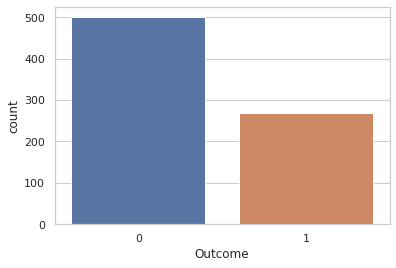

In [88]:
import seaborn as sns
print(db.groupby('Outcome').size())
sns.countplot(db['Outcome'],label="Count")

So, it's an imbalanced dataset!  
<a name="2.1"></a>
### Data distribution

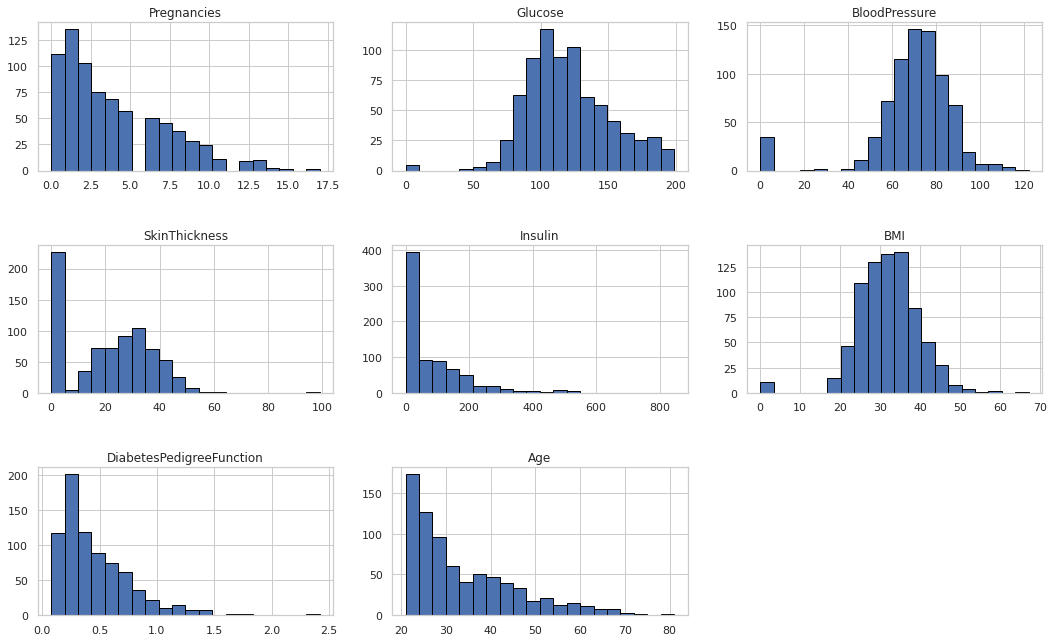

In [89]:
columns=db.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int(length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    db[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

<a name="2.2"></a>
### Pair Plots

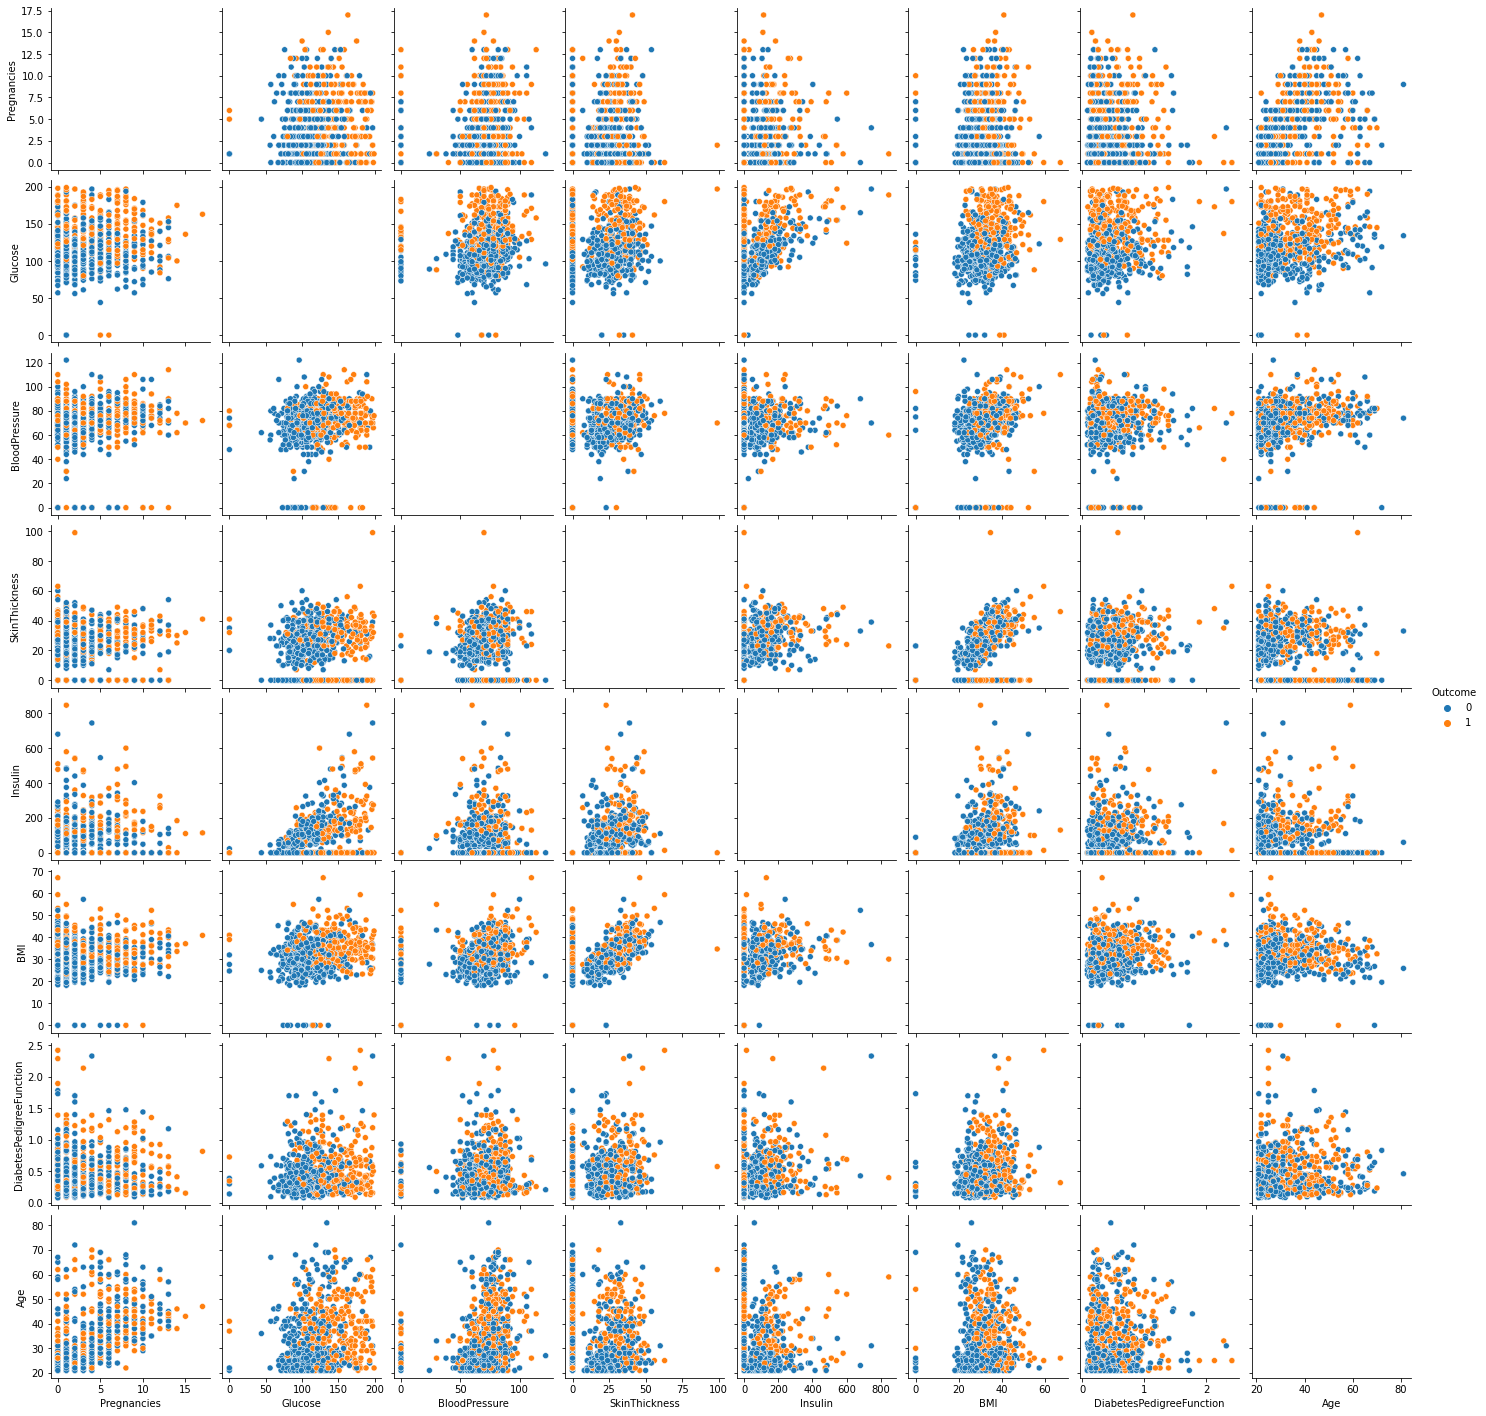

In [11]:
sns.pairplot(data=db,hue='Outcome',diag_kind='reg')
plt.show()

<a name="2.3"></a>
### Correlation of variables

In [12]:
db.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


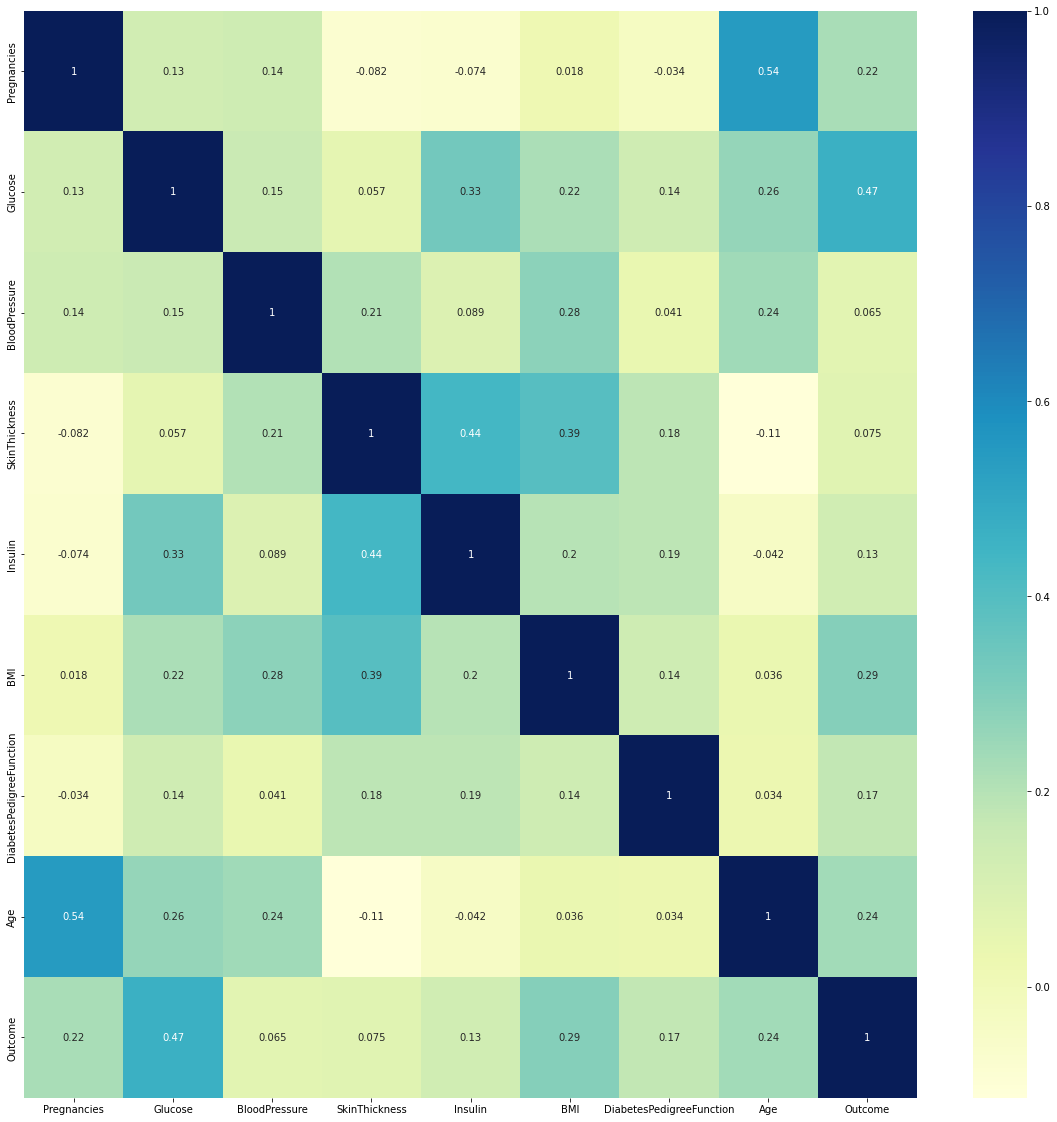

In [13]:
corr_val = db.corr()
top_corr_features = corr_val.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(db[top_corr_features].corr(),annot=True,cmap="YlGnBu")

<a name="2.4"></a>
### Search for relation between factors

In [14]:
import plotly.express as px

df = db
fig = px.scatter_3d(df, x='Glucose', y='DiabetesPedigreeFunction', z='Outcome',
                    color='Outcome')
fig.show()

In [15]:
import plotly.express as px
df = db
fig = px.scatter_3d(df, x='Glucose', y='BloodPressure', z='Outcome',
                    color='Outcome')
fig.show()

In [16]:
import plotly.express as px
df = db
fig = px.scatter_3d(df, x='Outcome', y='Insulin', z='Glucose',
                    color='Outcome')
fig.show()

After going through these features and trying to find out some relationship between them based on outcome, unfortunately I did not get anything significant. <br>
So, let us do something more with scatterplotting...  
<a name="2.5"></a>
# Scatterplot

In [17]:
for template in ["plotly"]:
    fig = px.scatter(db,
                     x="Glucose", y="BloodPressure", color="Outcome",
                     log_x=True, size_max=20,
                     template=template, title="Diabetes or not!")
    fig.show()

In [18]:
for template in ["plotly"]:
    fig = px.scatter(db,
                     x="Glucose", y="DiabetesPedigreeFunction", color="Outcome",
                     log_x=True, size_max=20,
                     template=template, title="Diabetes or not!")
    fig.show()

In [19]:
for template in ["plotly"]:
    fig = px.scatter(db,
                     x="Glucose", y="BMI", color="Outcome",
                     log_x=True, size_max=20,
                     template=template, title="Diabetes or not!")
    fig.show()

In [20]:
for template in ["plotly"]:
    fig = px.scatter(db,
                     x="Glucose", y="Insulin", color="Outcome",
                     log_x=True, size_max=20,
                     template=template, title="Diabetes or not!")
    fig.show()

Based on the analysis done above, I got something to talk about <br>
1. Scattered and unmatched items are out there in the dataset which may become the reason of less accuracy <br>
2. Glucose level more, with mid level blood pressure patients are more diabtic
3. High level of glucose and low level of prediction function values are making more diabetic patients
4. Mid level BMI and high level of glucose patients are considered as more diabtic 
5. Very low level of insuin and high level of glucose become the reason for a patient to be diabetic

<a name="3"></a>
# Analyze density (number of diabetic and non-diabetic patients in differnt features)
Primarily consider 'BMI', 'BloodPressure', 'Glucose' and 'DiabetesPedigreeFunction' as important features

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



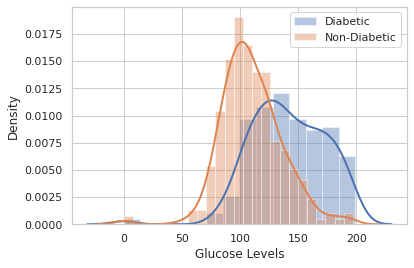

In [21]:
plt.figure()
sns.set(style='whitegrid')

sns.distplot(db[db['Outcome']==1]['Glucose'].dropna(),label='Diabetic',kde_kws={'linewidth': 2});
b = sns.distplot(db[db['Outcome']==0]['Glucose'].dropna(),label='Non-Diabetic',kde_kws={'linewidth': 2});
plt.legend();
b.set_xlabel('Glucose Levels');


The density of patients of the Non-diabetic patients is more higher in between (90-110) glucose levels.
However, diabetic patients have more glucose levels considering a bit less density of patients compared to non-diabetic patients

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



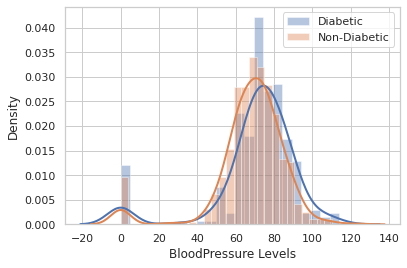

In [22]:
plt.figure()
sns.set(style='whitegrid')

sns.distplot(db[db['Outcome']==1]['BloodPressure'].dropna(),label='Diabetic',kde_kws={'linewidth': 2});
b = sns.distplot(db[db['Outcome']==0]['BloodPressure'].dropna(),label='Non-Diabetic',kde_kws={'linewidth': 2});
plt.legend();
b.set_xlabel('BloodPressure Levels');


Density levels are almost same for the BloodPressure feature

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



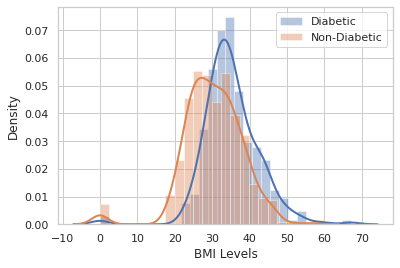

In [23]:
plt.figure()
sns.set(style='whitegrid')

sns.distplot(db[db['Outcome']==1]['BMI'].dropna(),label='Diabetic',kde_kws={'linewidth': 2});
b = sns.distplot(db[db['Outcome']==0]['BMI'].dropna(),label='Non-Diabetic',kde_kws={'linewidth': 2});
plt.legend();
b.set_xlabel('BMI Levels');


Diabetic patients have a tiny change in density compared to the non-diabetic patients



/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



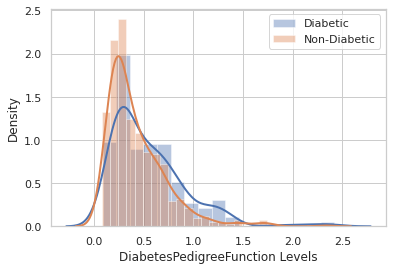

In [24]:
plt.figure()
sns.set(style='whitegrid')

sns.distplot(db[db['Outcome']==1]['DiabetesPedigreeFunction'].dropna(),label='Diabetic',kde_kws={'linewidth': 2});
b = sns.distplot(db[db['Outcome']==0]['DiabetesPedigreeFunction'].dropna(),label='Non-Diabetic',kde_kws={'linewidth': 2});
plt.legend();
b.set_xlabel('DiabetesPedigreeFunction Levels');


Not a very significant change here rather than the density of non-diabetic patients at here.

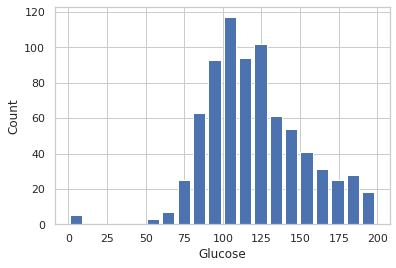

In [25]:
# Glucose Distribution
plt.hist(db.Glucose, bins=20, rwidth=0.8)
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.show()

In [26]:
db.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

<a name="4"></a>
# Evaluate on dataset

In [27]:
X_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Y_cols = ['Outcome']

In [147]:
x = db[X_cols]
y = db[Y_cols]

<a name = "4.1"> </a>
### Train-Test split

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=66)

In [30]:
X_train.shape

(614, 8)

In [31]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
684,5,136,82,0,0,0.0,0.640,69
237,0,179,90,27,0,44.1,0.686,23
67,2,109,92,0,0,42.7,0.845,54
156,2,99,52,15,94,24.6,0.637,21
600,1,108,88,19,0,27.1,0.400,24
...,...,...,...,...,...,...,...,...
717,10,94,72,18,0,23.1,0.595,56
122,2,107,74,30,100,33.6,0.404,23
51,1,101,50,15,36,24.2,0.526,26
631,0,102,78,40,90,34.5,0.238,24


<a name = "4.2"> </a>
### Evaluation results of models

In [104]:
from sklearn.metrics import accuracy_score
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    # return accuracy_score(y_test, y_pred)

<a name = "4.3"> </a>
# Apply algorithms
### Logistic Regression Classifier

In [71]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))
logreg_acc = accuracy_score(logreg.predict(X_test), y_test)

Training set accuracy: 0.775
Test set accuracy: 0.753


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       108
           1       0.62      0.46      0.52        46

    accuracy                           0.75       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.74      0.75      0.74       154



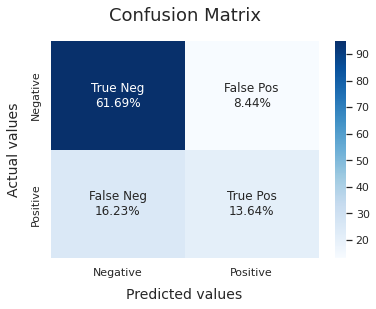

In [34]:
model_Evaluate(logreg)

In [72]:
logreg1 = LogisticRegression(solver = 'liblinear', C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg1.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg1.score(X_test, y_test)))
logreg1_acc = accuracy_score(logreg1.predict(X_test), y_test)

Training set accuracy: 0.717
Test set accuracy: 0.656


#### Feature importance of Logistic Regression classifier

(-1.0, 8.0)

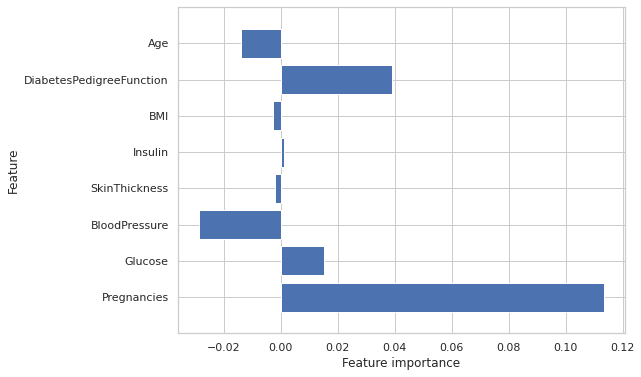

In [91]:
diabetes_features = [x for i,x in enumerate(db.columns) if i!=8]
plt.figure(figsize=(8,6))
n_features = 8
plt.barh(range(n_features), logreg1.coef_[0], align='center')
plt.yticks(np.arange(n_features), diabetes_features)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

We're gonna use permutaion imoortance for KNeighbors classfier as it does not have direct feature importance function.  
**Permutation importance** directly measures variable importance by observing the effect on model accuracy of randomly shuffling each predictor variable

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
knn_acc = accuracy_score(knn.predict(X_test), y_test)

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.72


              precision    recall  f1-score   support

           0       0.79      0.82      0.81       108
           1       0.54      0.48      0.51        46

    accuracy                           0.72       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.71      0.72      0.72       154



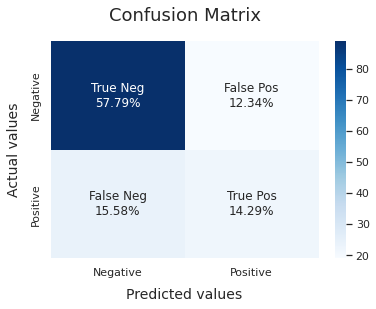

In [38]:
model_Evaluate(knn)

In [39]:
f_imp_knn = permutation_importance(knn, X_test, y_test, scoring='accuracy')
f_imp_knn

{'importances_mean': array([ 0.0025974 ,  0.06883117,  0.03766234, -0.01428571,  0.00649351,
         0.01298701,  0.        ,  0.01818182]),
 'importances_std': array([0.00318116, 0.01995103, 0.02069789, 0.00954347, 0.02249417,
        0.00410685, 0.        , 0.02705541]),
 'importances': array([[ 0.        ,  0.00649351,  0.        ,  0.00649351,  0.        ],
        [ 0.07792208,  0.09090909,  0.08441558,  0.05194805,  0.03896104],
        [ 0.07142857,  0.03896104,  0.01298701,  0.01948052,  0.04545455],
        [-0.02597403, -0.01948052,  0.        , -0.00649351, -0.01948052],
        [ 0.03896104, -0.01948052,  0.02597403,  0.        , -0.01298701],
        [ 0.01298701,  0.00649351,  0.01298701,  0.01948052,  0.01298701],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [-0.01948052,  0.01298701,  0.05194805,  0.        ,  0.04545455]])}

we need only **importances_mean**   
#### Feature Importance of KNeignbors classifier

(-1.0, 8.0)

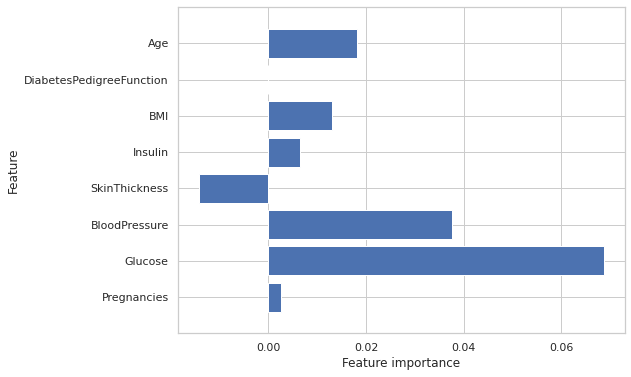

In [40]:
f_imp_knn = f_imp_knn.importances_mean
plt.figure(figsize=(8,6))
n_features = 8
plt.barh(range(n_features), f_imp_knn, align='center')
plt.yticks(np.arange(n_features), diabetes_features)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

#### Feature Importance Function  
For tree type algortihms (Decision Trees, Random Forest)

In [41]:
diabetes_features = [x for i,x in enumerate(db.columns) if i!=8]
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

We only show feature importance of tree type algorithms  
### Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
dt_acc = accuracy_score(dt.predict(X_test), y_test)

Accuracy on training set: 1.000
Accuracy on test set: 0.753


In [43]:
dt_acc

0.7532467532467533

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       108
           1       0.59      0.59      0.59        46

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154



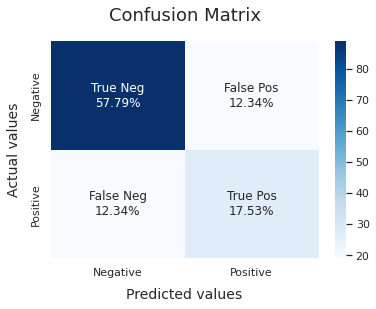

In [44]:
model_Evaluate(dt)

#### Feature Importance of Decision Trees

Pregnancies --> 0.0451892699976237
Glucose --> 0.3563435516838574
BloodPressure --> 0.045980185586139546
SkinThickness --> 0.0506428481130398
Insulin --> 0.09768074574646282
BMI --> 0.1677337036178505
DiabetesPedigreeFunction --> 0.10677767166338328
Age --> 0.129652023591643


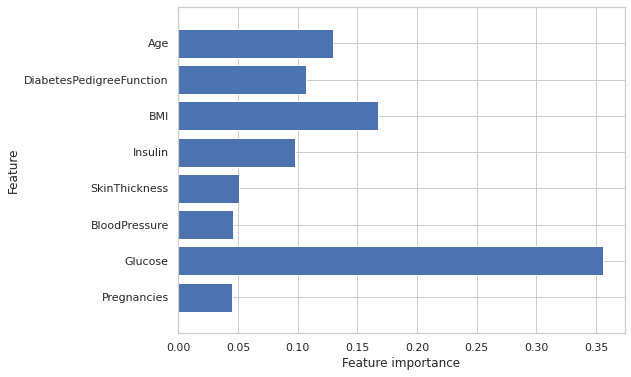

In [92]:
for i,v in enumerate(dt.feature_importances_):
    print(db.columns[i],"-->", v)

plot_feature_importances_diabetes(dt)

### Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))
rf_acc = accuracy_score(rf.predict(X_test), y_test)

Accuracy on training set: 1.000
Accuracy on test set: 0.747


In [47]:
rf_acc

0.7467532467532467

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       108
           1       0.59      0.52      0.55        46

    accuracy                           0.75       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.74      0.75      0.74       154



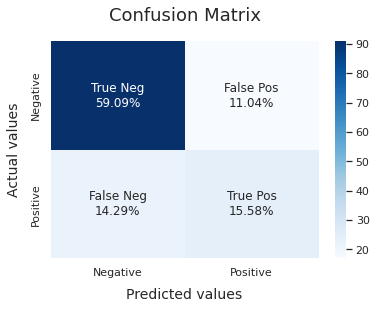

In [48]:
model_Evaluate(rf)

#### Feature Importance of Random Forest

Pregnancies --> 0.08641589686277301
Glucose --> 0.26851393259140083
BloodPressure --> 0.08570456537783076
SkinThickness --> 0.07569325212369438
Insulin --> 0.07142159413285505
BMI --> 0.15852388875505824
DiabetesPedigreeFunction --> 0.1167623635977125
Age --> 0.13696450655867531


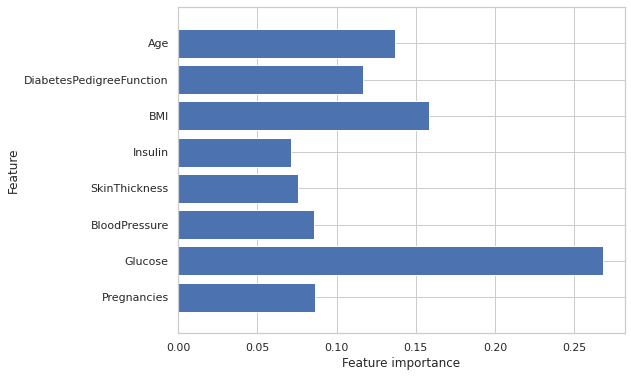

In [49]:
for i,v in enumerate(rf.feature_importances_):
    print(db.columns[i],"-->", v)

plot_feature_importances_diabetes(rf)

### XGbost Classifier

In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(xgb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xgb.score(X_test, y_test)))
xgb_acc = accuracy_score(xgb.predict(X_test), y_test)

[08:06:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on training set: 1.000
Accuracy on test set: 0.727


#### Feature Importance of Xgboost classifier

Pregnancies --> 0.103137314
Glucose --> 0.27929696
BloodPressure --> 0.0874405
SkinThickness --> 0.077102214
Insulin --> 0.10572569
BMI --> 0.13272627
DiabetesPedigreeFunction --> 0.08742406
Age --> 0.12714693


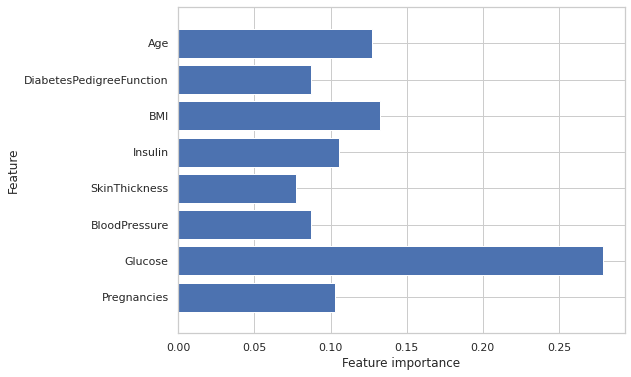

In [51]:
for i,v in enumerate(xgb.feature_importances_):
    print(db.columns[i],"-->", v)

plot_feature_importances_diabetes(xgb)

### k-Fold cross-validation  
We could have use other ML algorithms, but for the sake of simplicity of the notebook, we kept it small

In [152]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

model_params = {

    'knn':{
        'model': KNeighborsClassifier(n_neighbors=9),
        'params':{
            'n_neighbors':[8,9,10]
        }
    },
     'decision_tree':{
        'model': DecisionTreeClassifier(random_state=0),
        'params':{
            'max_depth':[3,4]
        }
        },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,100]
        }
    },
    'Xgboost' : {
        'model': XGBClassifier(),
        'params': {
            'base_score': [0.1, 0.5, 0.8]
        }
    }
}

In [153]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


[09:32:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:32:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:32:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:32:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,model,best_score,best_params
0,knn,0.750038,{'n_neighbors': 8}
1,decision_tree,0.730524,{'max_depth': 4}
2,random_forest,0.753892,{'n_estimators': 10}
3,logistic_regression,0.772193,{'C': 100}
4,Xgboost,0.752653,{'base_score': 0.5}


<a name = "5"> </a>
# OUTLIERS!!!  
Let's improve performance using outliers. We basically remove some less important data tha deviate our performance. We use **Z-SCORE** here! <br>
Z-score = (X-mean)/sigma   
Here, we're goona calculate z-score based on two features 
1. Glucose
2. BloddPressure

An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way.  
[Read details](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)

In [54]:
# Make a copy of main dataset
db_new = db
db_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### z-score calculated from feature -> Glucose

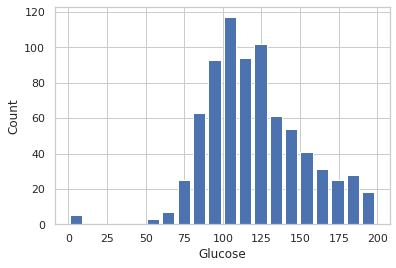

In [55]:
plt.hist(db.Glucose, bins=20, rwidth=0.8)
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.show()

In [56]:
db_new['zscore'] = ( db_new.Glucose - db_new.Glucose.mean() ) / db_new.Glucose.std()

See how the new column has been added.   
We used Glucose column for the z-score value as it follows Gaussian Distribution.


In [57]:
db_new.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,zscore
0,6,148,72,35,0,33.6,0.627,50,1,0.847771
1,1,85,66,29,0,26.6,0.351,31,0,-1.122665
2,8,183,64,0,0,23.3,0.672,32,1,1.942458
3,1,89,66,23,94,28.1,0.167,21,0,-0.997558
4,0,137,40,35,168,43.1,2.288,33,1,0.503727


In [58]:
# range selection for z_score (three standard deviation selected)
db_new[(db_new.zscore<-3) | (db_new.zscore>3)].shape

(5, 10)

Only 5 data will be discarded while considering **zscore** as outliers!
### z-score calculated from feature -> BloodPressure  
For the sake of collision of z-score names,  we named it as **zscore1**

In [59]:
db_new['zscore1'] = ( db_new.BloodPressure - db_new.BloodPressure.mean() ) / db_new.BloodPressure.std()
db_new.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,zscore,zscore1
0,6,148,72,35,0,33.6,0.627,50,1,0.847771,0.149543
1,1,85,66,29,0,26.6,0.351,31,0,-1.122665,-0.160441
2,8,183,64,0,0,23.3,0.672,32,1,1.942458,-0.263769
3,1,89,66,23,94,28.1,0.167,21,0,-0.997558,-0.160441
4,0,137,40,35,168,43.1,2.288,33,1,0.503727,-1.503707


In [60]:
# take upto 3 standard deviation and discard others
db_new[(db_new.zscore1<-3) | (db_new.zscore1>3)].shape

(35, 11)

<a name = "5.1"> </a>
35 data will be discarded as outliers for considering **zscore1**
### Wrap up together  
Apply both **zscore** and **zscore1** for outliers

In [62]:
db_new_two = db_new [(db_new.zscore>-3) & (db_new.zscore<3)]
db_new_two = db_new_two [(db_new_two.zscore1>-3) & (db_new_two.zscore1<3)]
db_new_two = db_new_two.drop(db_new_two.columns[[9,10]],axis=1)
db_new_two

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Wow! we have deduced some of our data considering outliers!!!  

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/di

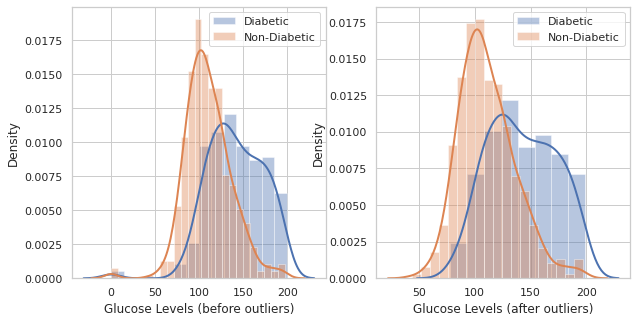

In [63]:
#GridSpec
from matplotlib.gridspec import GridSpec
row = 1
col = 2

fig = plt.figure(figsize = (10,5)) 
gs = GridSpec(row, col)

fig.add_subplot(gs[0])
sns.set(style='whitegrid')

sns.distplot(db[db['Outcome']==1]['Glucose'].dropna(),label='Diabetic',kde_kws={'linewidth': 2});
b = sns.distplot(db[db['Outcome']==0]['Glucose'].dropna(),label='Non-Diabetic',kde_kws={'linewidth': 2});
plt.legend();
b.set_xlabel('Glucose Levels (before outliers)');


fig.add_subplot(gs[1])
sns.set(style='whitegrid')

sns.distplot(db_new_two[db_new_two['Outcome']==1]['Glucose'].dropna(),label='Diabetic',kde_kws={'linewidth': 2});
b = sns.distplot(db_new_two[db_new_two['Outcome']==0]['Glucose'].dropna(),label='Non-Diabetic',kde_kws={'linewidth': 2});
plt.legend();
b.set_xlabel('Glucose Levels (after outliers)');

plt.show()

See, a significant improvement in the outliers and we discarded some dataset that were deviating our result!!!

<a name = "5.2"> </a>
# Move with new dataset

In [65]:
from sklearn.model_selection import train_test_split
X = db_new_two.loc[:, db_new_two.columns != 'Outcome']
Y = db_new_two['Outcome']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, stratify = db_new_two['Outcome'], random_state=66)

### Performance evaluation function for outliers

In [121]:
from sklearn.metrics import accuracy_score
def model_Evaluate_outliers(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test1)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test1, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test1, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    # return accuracy_score(y_test, y_pred)

<a name = "5.3"> </a>
# Apply algorithms 
### Logistic Regression (outliers)

Training set accuracy: 0.764
Test set accuracy: 0.797
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       120
           1       0.82      0.52      0.63        62

    accuracy                           0.80       182
   macro avg       0.81      0.73      0.75       182
weighted avg       0.80      0.80      0.78       182



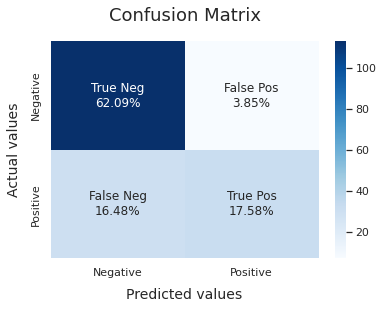

In [122]:
from sklearn.linear_model import LogisticRegression

logreg_o = LogisticRegression(solver = 'liblinear').fit(X_train1, y_train1)
print("Training set accuracy: {:.3f}".format(logreg_o.score(X_train1, y_train1)))
print("Test set accuracy: {:.3f}".format(logreg_o.score(X_test1, y_test1)))
logreg_o_acc = accuracy_score(logreg_o.predict(X_test1), y_test1)

model_Evaluate_outliers(logreg_o)

Training set accuracy: 0.718
Test set accuracy: 0.709
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       120
           1       0.60      0.45      0.51        62

    accuracy                           0.71       182
   macro avg       0.67      0.65      0.65       182
weighted avg       0.70      0.71      0.70       182



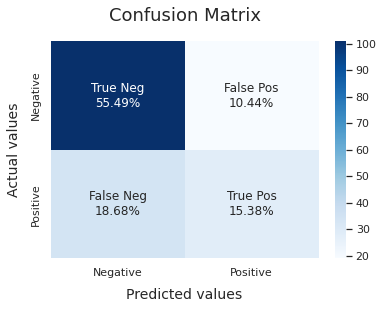

In [123]:
logreg1_o = LogisticRegression(solver = 'liblinear', C=0.01).fit(X_train1, y_train1)
print("Training set accuracy: {:.3f}".format(logreg1_o.score(X_train1, y_train1)))
print("Test set accuracy: {:.3f}".format(logreg1_o.score(X_test1, y_test1)))
logreg1_o__acc = accuracy_score(logreg1_o.predict(X_test1), y_test1)
model_Evaluate_outliers(logreg1_o)

(-1.0, 8.0)

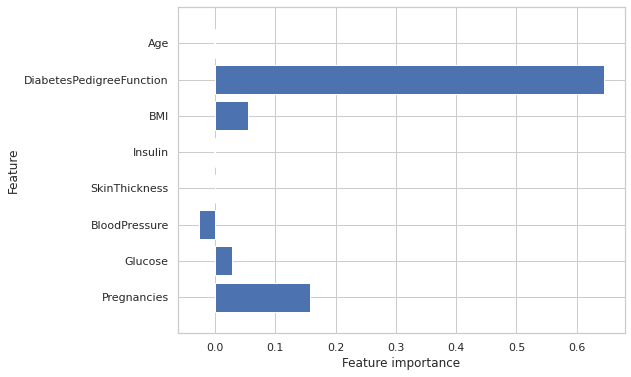

In [124]:
diabetes_features = [x for i,x in enumerate(db.columns) if i!=8]
plt.figure(figsize=(8,6))
n_features = 8
plt.barh(range(n_features), logreg_o.coef_[0], align='center')
plt.yticks(np.arange(n_features), diabetes_features)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

### KNN classifier (outliers)

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.77
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       120
           1       0.76      0.50      0.60        62

    accuracy                           0.77       182
   macro avg       0.77      0.71      0.72       182
weighted avg       0.77      0.77      0.76       182



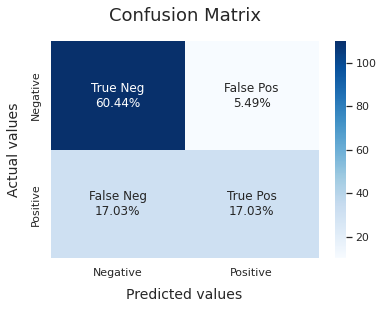

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

knn_o = KNeighborsClassifier(n_neighbors=13)
knn_o.fit(X_train1, y_train1)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn_o.score(X_train1, y_train1)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn_o.score(X_test1, y_test1)))
knn_o_acc = accuracy_score(knn_o.predict(X_test1), y_test1)

model_Evaluate_outliers(knn_o)

(-1.0, 8.0)

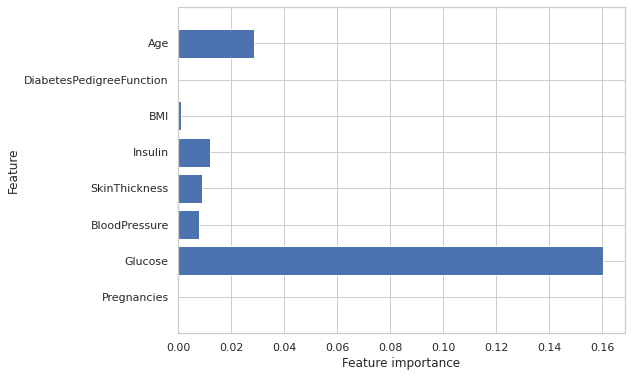

In [126]:
f_imp_knn = permutation_importance(knn_o, X_test1, y_test1, scoring='accuracy')
f_imp_knn

f_imp_knn = f_imp_knn.importances_mean
plt.figure(figsize=(8,6))
n_features = 8
plt.barh(range(n_features), f_imp_knn, align='center')
plt.yticks(np.arange(n_features), diabetes_features)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)


### Decision Trees classifier (outliers)

Accuracy on training set: 1.000
Accuracy on test set: 0.703
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       120
           1       0.58      0.48      0.53        62

    accuracy                           0.70       182
   macro avg       0.67      0.65      0.66       182
weighted avg       0.69      0.70      0.70       182



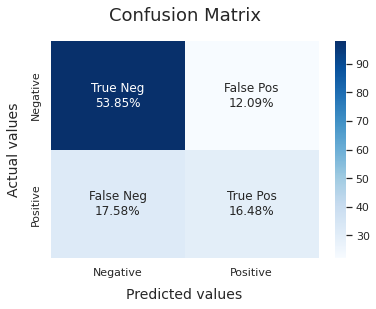

In [127]:
from sklearn.tree import DecisionTreeClassifier

dt_o = DecisionTreeClassifier(random_state=0)
dt_o.fit(X_train1, y_train1)
print("Accuracy on training set: {:.3f}".format(dt_o.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(dt_o.score(X_test1, y_test1)))
dt_o_acc = accuracy_score(dt_o.predict(X_test1), y_test1)

model_Evaluate_outliers(dt_o)

Pregnancies --> 0.09183105217679363
Glucose --> 0.3032839594671431
BloodPressure --> 0.07950583520905888
SkinThickness --> 0.035333484614359444
Insulin --> 0.07884453095645336
BMI --> 0.15460012582959895
DiabetesPedigreeFunction --> 0.14953621668330214
Age --> 0.10706479506329046


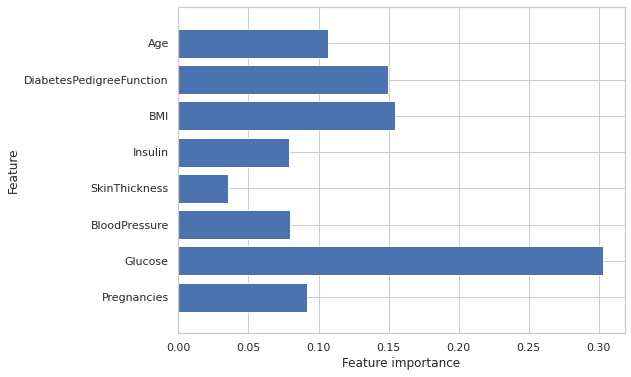

In [128]:
for i,v in enumerate(dt_o.feature_importances_):
    print(db.columns[i],"-->", v)

plot_feature_importances_diabetes(dt_o)

### Random Forest classifier (outliers)

Accuracy on training set: 1.000
Accuracy on test set: 0.791
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       120
           1       0.77      0.55      0.64        62

    accuracy                           0.79       182
   macro avg       0.78      0.73      0.75       182
weighted avg       0.79      0.79      0.78       182



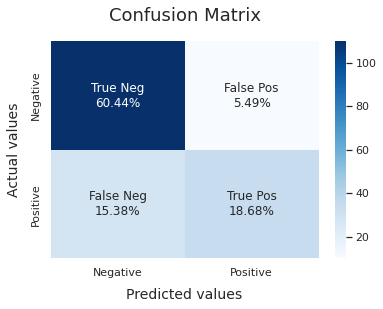

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf_o = RandomForestClassifier(n_estimators=100, random_state=0)
rf_o.fit(X_train1, y_train1)
print("Accuracy on training set: {:.3f}".format(rf_o.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(rf_o.score(X_test1, y_test1)))
rf_o_acc = accuracy_score(rf_o.predict(X_test1), y_test1)

model_Evaluate_outliers(rf_o)

Pregnancies --> 0.0919024092497639
Glucose --> 0.2264502392704563
BloodPressure --> 0.08879395658816956
SkinThickness --> 0.07398638876835713
Insulin --> 0.08210883235169447
BMI --> 0.16704784871083614
DiabetesPedigreeFunction --> 0.12378829335027332
Age --> 0.14592203171044923


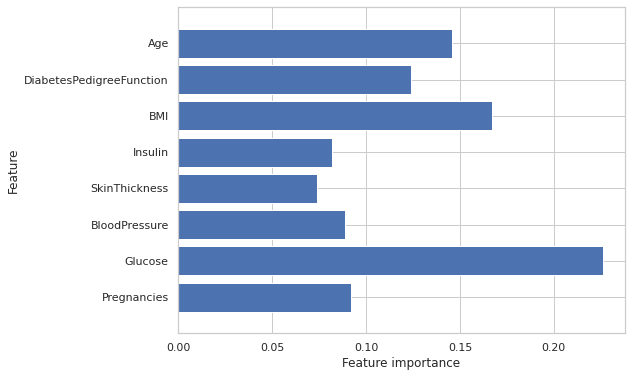

In [130]:
for i,v in enumerate(rf_o.feature_importances_):
    print(db.columns[i],"-->", v)

plot_feature_importances_diabetes(rf_o)

### Xgboost classifier (outliers)

[09:17:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on training set: 1.000
Accuracy on test set: 0.747
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       120
           1       0.67      0.52      0.58        62

    accuracy                           0.75       182
   macro avg       0.72      0.69      0.70       182
weighted avg       0.74      0.75      0.74       182



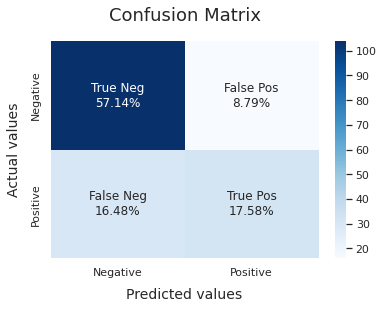

In [131]:
from xgboost import XGBClassifier
xgb_o = XGBClassifier()
xgb_o.fit(X_train1, y_train1)
print("Accuracy on training set: {:.3f}".format(xgb_o.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(xgb_o.score(X_test1, y_test1)))
xgb_o_acc = accuracy_score(xgb_o.predict(X_test1), y_test1)

model_Evaluate_outliers(xgb_o)

Pregnancies --> 0.13747792
Glucose --> 0.24641752
BloodPressure --> 0.07582791
SkinThickness --> 0.08663153
Insulin --> 0.08913396
BMI --> 0.13759573
DiabetesPedigreeFunction --> 0.107649066
Age --> 0.119266406


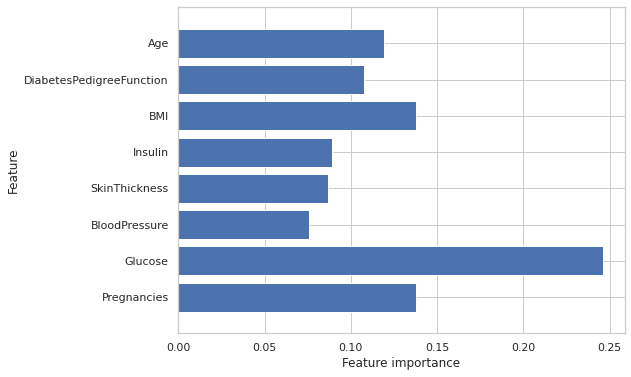

In [132]:
for i,v in enumerate(xgb_o.feature_importances_):
    print(db.columns[i],"-->", v)

plot_feature_importances_diabetes(xgb_o)

<a name = "6"> </a>
# Comparison

In [154]:
algo_acc = [knn_acc, dt_acc, rf_acc, logreg_acc, xgb_acc]
algo_o_acc = [knn_o_acc, dt_o_acc, rf_o_acc, logreg_o_acc, xgb_o_acc]
algo_names = ['KNeighbors classifier', 'Decision Trees classifier', 'Random Forest classifier', 'Logistic Regression', 'Xgboost classifier']

In [156]:
df_final = pd.DataFrame({
    'Algorithm Name' : algo_names,
    'Accuracy' : algo_acc,
    'Accuracy (outliers)' : algo_o_acc
})
df_final

,Algorithm Name,Accuracy,Accuracy (outliers)
0,KNeighbors classifier,0.720779,0.774725
1,Decision Trees classifier,0.753247,0.703297
2,Random Forest classifier,0.746753,0.791209
3,Logistic Regression,0.753247,0.796703
4,Xgboost classifier,0.727273,0.747253


Finally, we see that the outlier does the ultimate improvement in the performance of the dataset. However, Decision Tree shows a bit low performance than before. 
## Descussion :  
We can use different outlier concepts based on the dataset (must observe it well) and this may helpful for more knowledge about outliers.
# Cheers!! 👏